In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [4]:
def simulate_arma1(phi_0, phi_1, theta_1, sigma, T, random_state, plot = True):
    y = np.zeros(T)
    if phi_1 == 1:
        y[0] = stats.norm.rvs(1)
    else:
        y[0] = phi_0 / (1-phi_1)
    epsilons = stats.norm.rvs(size = T, scale = sigma, random_state = random_state)
    for t in range(1, T):
        y[t] = phi_0 + phi_1*y[t-1] + epsilons[t] + theta_1*epsilons[t-1]
    return y

def plot_series(y, title):
    fig = plt.figure(figsize = (8,4.5))
    plt.plot(y)
    plt.xlabel('Период')
    plt.ylabel('Значение')
    plt.title(title)
    plt.show()

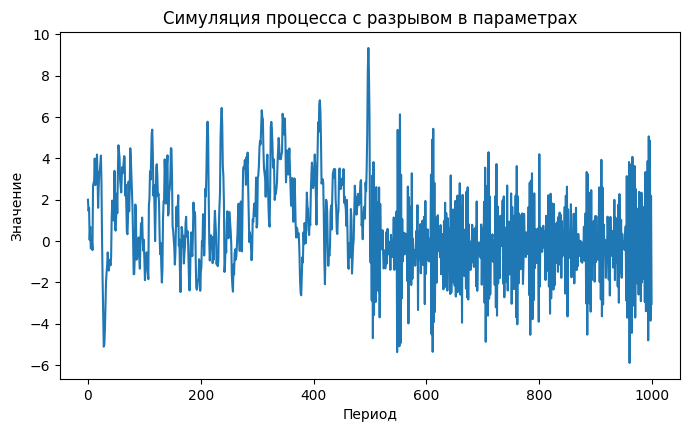

In [5]:
y1 = simulate_arma1(phi_0 = 0.4, phi_1 = 0.8, theta_1 = 0.3, sigma = 1, T = 500, random_state = 12, plot = False)
y2 = simulate_arma1(phi_0 = -0.4, phi_1 = -0.8, theta_1 = -0.3, sigma = 1, T = 500, random_state = 12, plot = False)
y = np.concatenate([y1, y2])

plot_series(y, 'Симуляция процесса с разрывом в параметрах')

In [14]:
evaluation = pd.DataFrame(columns = ['lagAR', 'lagMA', 'aic', 'bic'])
row = 0
for i in range(0,5):
    for j in range(0,5):
        results = sm.tsa.arima.ARIMA(y, order=(i, 0, j)).fit()
        evaluation.loc[row, ['lagAR', 'lagMA', 'aic', 'bic']] = [i, j, results.aic, results.bic]
        row += 1

C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-i

In [15]:
evaluation.sort_values(by = 'bic').head()

,lagAR,lagMA,aic,bic
10,2,0,3720.928617,3740.559638
15,3,0,3722.55075,3747.089527
11,2,1,3722.609933,3747.148709
20,4,0,3720.055526,3749.502058
12,2,2,3720.265195,3749.711727


In [19]:
results = sm.tsa.arima.ARIMA(y, order=(2, 0, 0)).fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1856.464
Date:                Fri, 06 Dec 2024   AIC                           3720.929
Time:                        19:53:15   BIC                           3740.560
Sample:                             0   HQIC                          3728.390
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6445      0.227      2.844      0.004       0.200       1.089
ar.L1          0.0546      0.019      2.810      0.005       0.017       0.093
ar.L2          0.7274      0.020     35.764      0.0

In [22]:
T = len(y)
tau = 500
d1 = np.zeros(T)
d1[tau:] = 1
Y = y[1:]
X = np.vstack((y[:-1], d1[1:], y[:-1]*d1[1:])).T
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     1259.
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:59:49   Log-Likelihood:                -1468.3
No. Observations:                 999   AIC:                             2945.
Df Residuals:                     995   BIC:                             2964.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1868      0.058      3.242      0.0

In [21]:
hypothesis = [0,0,1,1]
f_test = results.f_test(hypothesis)
print(f_test.summary())

<F test: F=1056.2963401458817, p=1.696221069449789e-158, df_denom=995, df_num=1>


In [11]:
Y = y[1:]
X = y[:-1]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     43.04
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           8.60e-11
Time:                        18:49:36   Log-Likelihood:                -2230.4
No. Observations:                 999   AIC:                             4465.
Df Residuals:                     997   BIC:                             4475.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5112      0.074      6.886      0.0

In [26]:
periods = []
QLRstat = []
T = len(y)
tau0 = int(np.ceil(0.15*T))
tau1 = int(np.floor(0.85*T))

for t in range(tau0,tau1):
    d1 = np.zeros(T)
    d1[t:] = 1
    Y = y[1:]
    X = np.vstack((y[:-1], d1[1:], y[:-1]*d1[1:])).T
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    f_test = results.f_test([0,0,1,1])
    fvalue = f_test.fvalue
    periods.append(t)
    QLRstat.append(fvalue)

QLR_statistics = pd.DataFrame({'t': periods, 'QLRstat': QLRstat})

In [27]:
QLR_statistics[QLR_statistics['QLRstat'] == QLR_statistics['QLRstat'].max()]

,t,QLRstat
351,501,1056.29634


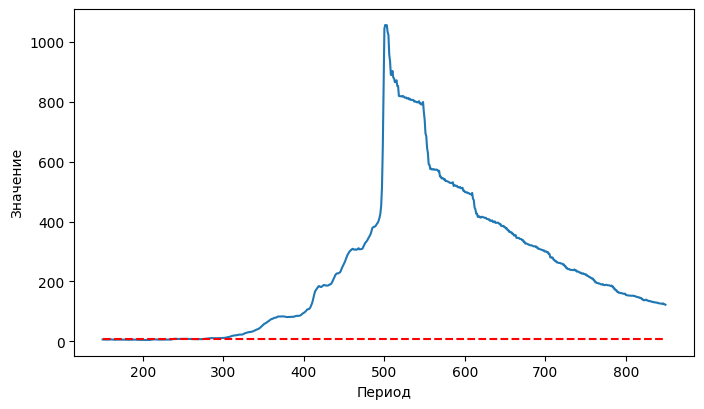

In [35]:
fig = plt.figure(figsize = (8,4.5))
plt.plot(QLR_statistics['t'], QLR_statistics['QLRstat'])
plt.xlabel('Период')
plt.ylabel('Значение')
plt.hlines(xmin = tau0, xmax = tau1, y = 7.78 , colors='r', linestyles = 'dashed')
#plt.title(title)
plt.show()

In [36]:
usdrub = pd.read_csv(r'https://raw.githubusercontent.com/tea4erman/Sinergia-Time-Series/refs/heads/main/Data/lesson1_usdrub.csv', sep = ';', index_col = 0)
usdrub.index = pd.to_datetime(usdrub.index, format = '%d.%m.%Y')
usdrub = usdrub.sort_index(ascending = True)
usdrub = usdrub.loc['1998':]
usdrub['curs'] = usdrub['curs'].astype(float)
usdrub.head()

,curs
data,
1998-01-01,5.960
1998-01-06,5.963
1998-01-07,5.969
1998-01-09,5.972
1998-01-10,5.974


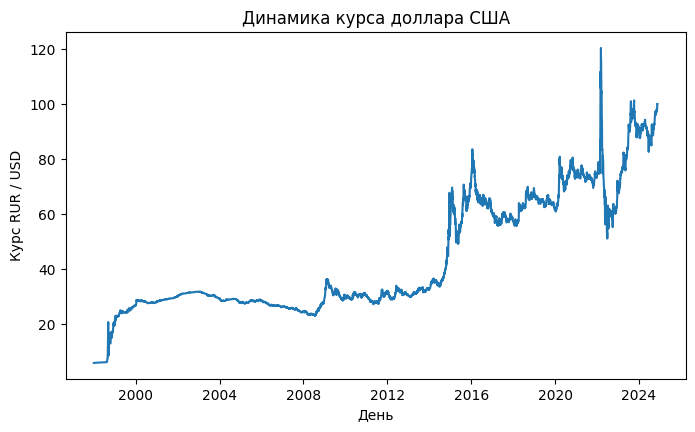

In [37]:
fig = plt.figure(figsize = (8,4.5))
plt.plot(usdrub['curs'])
plt.xlabel('День')
plt.ylabel('Курс RUR / USD')
plt.title('Динамика курса доллара США')
plt.show()

In [38]:
adftest = adfuller(usdrub.dropna(), maxlag = 10, regression = 'c')

dfoutput = pd.Series(
        adftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ]
)

dfoutput

Test Statistic                   -0.821282
p-value                           0.812791
#Lags Used                        6.000000
Number of Observations Used    6667.000000
dtype: float64

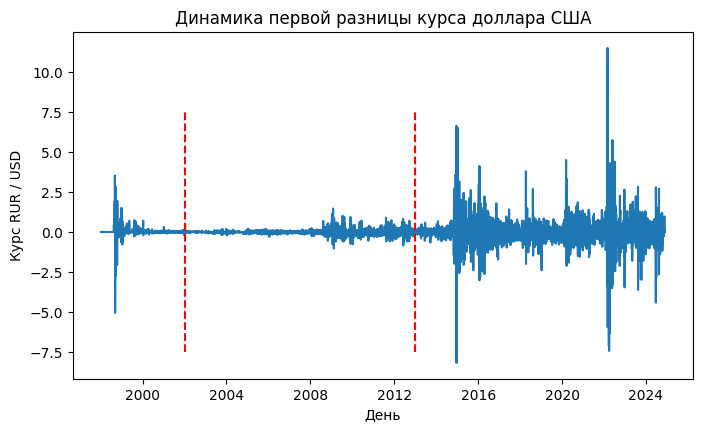

In [104]:
fig = plt.figure(figsize = (8,4.5))
plt.plot(usdrub['curs'].diff().dropna())
plt.xlabel('День')
plt.ylabel('Курс RUR / USD')
plt.title('Динамика первой разницы курса доллара США')
plt.vlines(ymin = -7.5, ymax = 7.5, x = usdrub.loc['2002-01-01'].name, colors='r', linestyles = 'dashed')
plt.vlines(ymin = -7.5, ymax = 7.5, x = usdrub.loc['2012-12-30'].name, colors='r', linestyles = 'dashed')
plt.show()

In [43]:
adftest = adfuller(usdrub.diff().dropna(), maxlag = 10, regression = 'c')

dfoutput = pd.Series(
        adftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ]
)

dfoutput

Test Statistic                  -29.791885
p-value                           0.000000
#Lags Used                        5.000000
Number of Observations Used    6667.000000
dtype: float64

In [86]:
usdrub.loc['2002':'2012']

,curs
data,
2002-01-01,30.1372
2002-01-04,30.1372
2002-01-05,30.1372
2002-01-09,30.1372
2002-01-10,30.5753
...,...
2012-12-26,30.5926
2012-12-27,30.6150
2012-12-28,30.4808


In [80]:
y = usdrub.loc['2002':'2012'].diff().dropna().values.ravel()

In [81]:
periods = []
QLRstat = []
T = len(y)
tau0 = int(np.ceil(0.15*T))
tau1 = int(np.floor(0.85*T))

for t in range(tau0,tau1):
    d1 = np.zeros(T)
    d1[t:] = 1
    Y = y[1:]
    X = np.vstack((y[:-1], d1[1:], y[:-1]*d1[1:])).T
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    f_test = results.f_test([0,0,1,1])
    fvalue = f_test.fvalue
    periods.append(t)
    QLRstat.append(fvalue)

QLR_statistics = pd.DataFrame({'t': periods, 'QLRstat': QLRstat})

In [82]:
QLR_statistics[QLR_statistics['QLRstat'] == QLR_statistics['QLRstat'].max()]

,t,QLRstat
1363,1774,29.117629


In [106]:
usdrub.loc['2002':'2012'].iloc[1774]

curs    36.4267
Name: 2009-02-19 00:00:00, dtype: float64

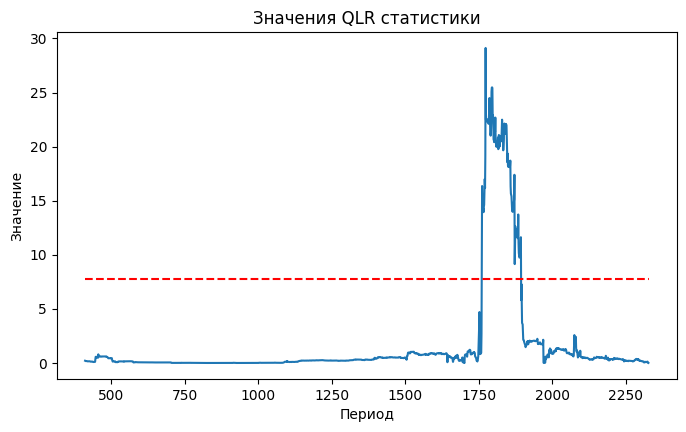

In [105]:
fig = plt.figure(figsize = (8,4.5))
plt.plot(QLR_statistics['t'], QLR_statistics['QLRstat'])
plt.xlabel('Период')
plt.ylabel('Значение')
plt.hlines(xmin = tau0, xmax = tau1, y = 7.78 , colors='r', linestyles = 'dashed')
plt.title('Значения QLR статистики')
plt.show()